# Лабораторная работа №3 (Пономарева А.Ю., группа БПМ-151) Решение нелинейных уравнений.
### № 3.1
Дана система уравнений $Ax = b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от
погрешностей правой части системы $b$.
Компоненты вектора $b$ во всех вариантах задаются формулой $b_i = N\;\forall\;i = 1...n$, <br/> 
коэффициенты $c = c_{ij} = 0.1\cdot N \cdot i \cdot j\;\;\forall\;\;i,\;j = 1...n$, <br/>
$N = 23\;- $ номер варианта.<br/>
$n = 5$ <br/>
$a_{ij} = \frac{11.7}{(1+c)^7}$

### Теоретическая часть.
#### Реализация метода Гаусса.
Есть система линейных уравнений $Ax=b$. 

1). Прямой ход. Матрица $A$ приводится к верхней треугольной матрице. Первую строку вычитают из остальных строк, домножив её на величину, равную отношению первого элемента каждой из этих строк к первому элементу первой строки , обнуляя тем самым столбец под ним. Потом вычитают вторую строку из последующих строк, умноженную на отношение второго элемента (первый элемент уже занулился) каждой из этих строк ко второму элементу (первый элемент уже занулился) второй строки, обнуляя столбец под элементом с индексами $(2,2)$. И так далее, пока матрица не станет ступенчатой.

2). Обратный ход.Суть заключается в выражении всех базисных элементов через небазисные. Этот этап начинается с последнего уравнения, в котором один базисный элемент. Подставляем его в предыдущие уравнения и поднимаемся постепенно на "ступеньку" вверх, находя поочерёдно все базисные элементы и подставляя их в уравнения выше.

Число обусловленности матрицы $A$ определяется по формуле: $\mu(A)=||A||*||A^{-1}||$. Под обусловленностью численной задачи понимают чувствительность её решения к погрешностям входных данных.

Норма матрицы в $R^m: ||A||_\infty =max \sum^m_{j=1}|a_{ij}|,  1<=i<=m$

Оценка погрешности решения: $
\delta(\vec x^*)<=cond(A)*\delta(A^*)$;
$
\delta(\vec x^*)<=cond(A)*\delta(\vec b^*)
$, где $\delta(A^*)=||A-A^*||/||A||$ и $\delta(\vec b^*)=||\vec b-\vec b^*||/||\vec b||$.

### Практическая часть.

In [11]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

### 1.Решение системы методом Гаусса и встроенным методом.

In [52]:
N=23 #номер варианта
n = 5
def a(i,j): # функция, задающая элементы матрицы А
    c = 0.1*i*j*N
    return 11.7/(1+c)**7

def Gauss(A,b): #функция метода Гаусса 
    AA=np.hstack((A,b))# соединяем матрицы A и b по горизонтали
    for j in range(AA.shape[0]-1): # проходим по всем строкам
        for i in range(1+j,AA.shape[1]-1): # проходим по всем столбцам
            m=AA[i,j]/AA[j,j]
            AA[i]=AA[i]-m*AA[j]#последовательно вычитаем из i-ых строк j-ую строку, умноженную на m
    # в итоге получаем верхнеугольную матрицу 
    X,ax=[[]for i in range(AA.shape[0])],0   
    for k in range(AA.shape[0]-1,-1,-1):# начинаем делать обратный ход
        if k == AA.shape[0]-1:
            X[k].append(AA[k,k+1]/AA[k,k])#вычислили первый элемент нашего ответа(последний по счету)
        else: #далее вычисляем все элементы нашего ответа поочередно, идя от х(n-1) до x(1)
            for j in range(AA.shape[0]-1,k,-1):
                ax+=AA[k,j]*X[j][0]
            X[k].append((AA[k,AA.shape[1]-1]-ax)/AA[k,k])
            ax=0
    return np.array(X) #возвращаем массив нашего ответа

A = np.array([[a(i,j) for j in range(1,n+1)]for i in range(1,n+1)])
b = np.array([[N]for i in range(n)])

In [53]:
ans=Gauss(A,b)

In [54]:
ans  #ответ

array([[ 7.87520182e+10],
       [-1.27712694e+14],
       [ 7.84563028e+15],
       [-7.76584134e+16],
       [ 1.61942733e+17]])

In [55]:
np.linalg.solve(A,b) #проверка встроенной функцией

array([[ 7.87520182e+10],
       [-1.27712694e+14],
       [ 7.84563028e+15],
       [-7.76584134e+16],
       [ 1.61942733e+17]])

### 2.Поиск числа обусловленности матрицы А.

С помощью встроенной функции вычислить число обусловленности матрицы  $A$.

In [56]:
cond=np.linalg.cond(A)#число обусловенности (плохо обусловленна, так как намного больше 1)
cond

41888683208666.88

### 3.Вычисление относительных погрешностей.

3. Принимая решение $x$, полученное в п. 1, за точное, вычислить вектор $d=(d_1,\dots,d_n)^T$, $d_i=\frac{||x-x^i||_\infty}{||x||_\infty}$, $i=1,\dots,n$, относительных погрешностей решений $x^i$ систем $Ax^i=b^i$, $i=1,\dots,n$, где  компоненты векторов $b^i$ вычисляются по формулам: $ b_k^i=
    \begin{cases} 
      b_k+\Delta, \ k=i \\
      b_k, \ k\neq i 
   \end{cases}
$, $k=1,\dots,n; \ \ (\Delta$ - произвольная величина погрешности).

In [57]:
delta=10**(-3)#произвольная величина погрешности
d=[[]for i in range(A.shape[0])]
def di(a): #функция вычисления компонентов вектора относительных погрешностей
    c=ans-a
    c=c.max()
    r=ans.max()
    return c/r
def bik(i): #функция вычисления компонентов веторов bi
    B = [[]for i in range(A.shape[0])]
    for k in range(A.shape[0]):
        if k==i:
            B[k].append(b[k][0]+delta)
        else:
            B[k].append(b[k][0])
    return np.array(B)

for j in range(A.shape[0]):#вычисляем для каждого вектора bi 
    B=bik(j)
    xj=Gauss(A,B)#вычисляем для каждого вектора bi свой ответ xj
    d[j].append(di(xj)) #обрабатываем его и добавляем в вектор относительных погрешностей 

In [58]:
Vd=np.array(d) #вектор относительных погрешностей 
Vd

array([[1.66653480e-11],
       [5.97569007e-08],
       [1.75563977e-06],
       [3.66129297e-05],
       [3.66129297e-05]])

### 4. Построение гистограммы.

На основе вычисленного вектора $d$ построить гистограмму. По гистограмме определить компоненту $b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения.

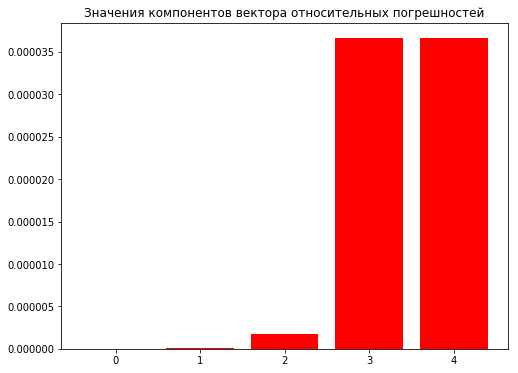

In [68]:
data_names = [str(i) for i in range(1,A.shape[0]+1)]#записываем 
data_values = [Vd[i][0] for i in range(A.shape[0])]     #данные
plt.figure(figsize=(8, 6))
plt.title('Значения компонентов вектора относительных погрешностей')
xs = range(len(data_names))
plt.bar([x for x in xs], [ d for d in data_values], color = 'red')
plt.show()
#Наибольшее влияние на погрешность оказывает 4-ая и 5-ая компонента вектора b

### 5.Теоретическая оценка погрешности.

Оценить теоретически погрешность решения $x^m$ по  формуле: $\delta(x^m)\leq cond(A)\cdot\delta(b^m)$. Сравнить значение $\delta(x^m)$ со значением практической погрешности $d_m$. Объяснить полученные результаты.

In [60]:
delta_x=cond*delta/N #число обусловленности матрицы умножаем на
#произвольную дельта из #3 и делим на номер варианта 
print('d(x*) <= '+str(delta_x)) 
print(delta_x<Vd)# сравниваем -> практическая погрешность меньше теоретической

d(x*) <= 1821247096.028995
[[False]
 [False]
 [False]
 [False]
 [False]]
